In [1]:
# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

colors = ["#280536", "#d10d6f"]

In [2]:
# Splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [3]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


### Verify that the dataset contains digits from 0 to 9 (10 classes).

In [4]:
unique_classes = np.unique(y_train)
print("Unique labels:", unique_classes)
print("Number of classes:", len(unique_classes))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


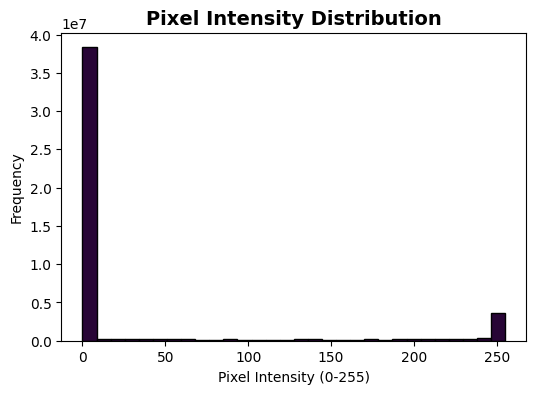

In [5]:
plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=30, color="#280536", edgecolor="black")
plt.title("Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

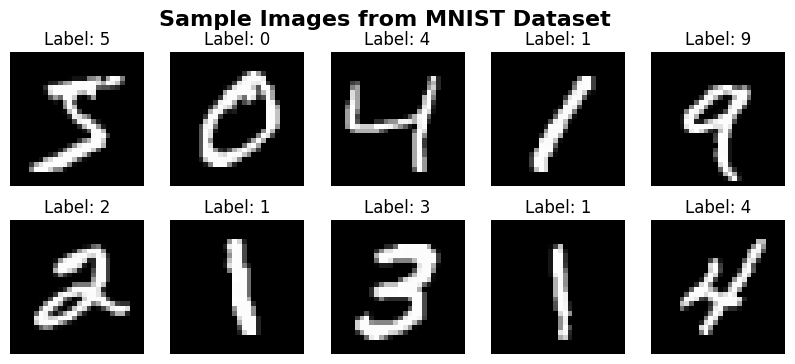

In [6]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.show()

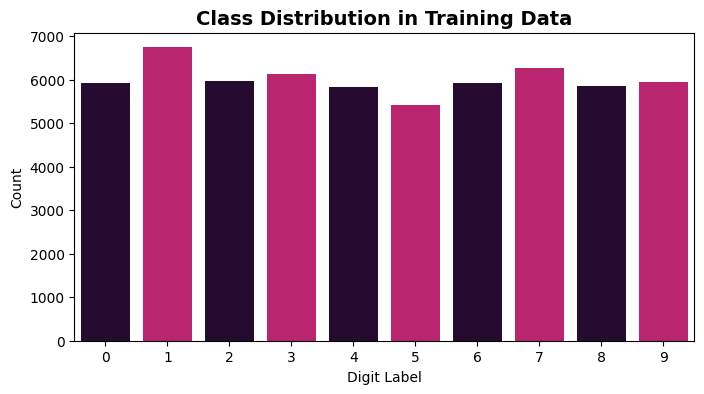

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, palette=colors)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

In [8]:
# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

After normalization:
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0


In [9]:
# Reshape training and testing images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

Training data shape after reshape: (60000, 28, 28, 1)
Testing data shape after reshape: (10000, 28, 28, 1)


In [10]:
# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

In [11]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7574 - loss: 0.7455 - val_accuracy: 0.9810 - val_loss: 0.0608
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9600 - loss: 0.1308 - val_accuracy: 0.9862 - val_loss: 0.0441
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9718 - loss: 0.0924 - val_accuracy: 0.9855 - val_loss: 0.0445
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0819 - val_accuracy: 0.9893 - val_loss: 0.0368
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9805 - loss: 0.0673 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9796 - loss: 0.0657 - val_accuracy: 0.9910 - val_loss: 0.0301
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9892 - val_loss: 0.0324
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9842 - loss: 0.0499 - val_accuracy: 

In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Test Accuracy: 0.9930
✅ Test Loss: 0.0229


In [15]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


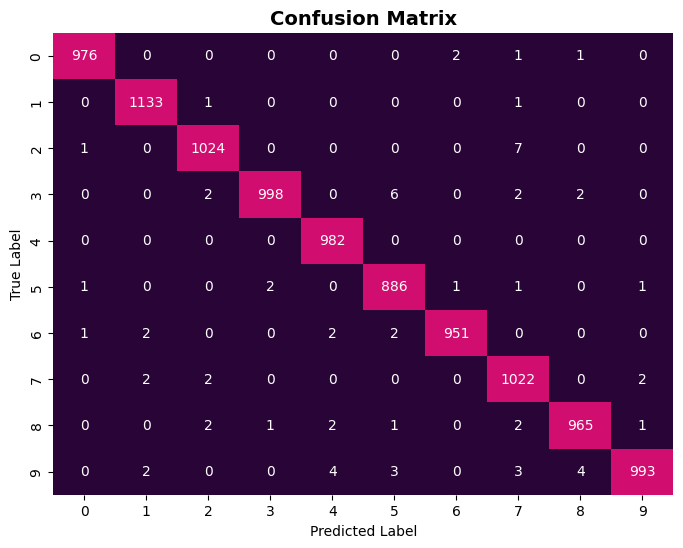

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors, cbar=False)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9969    0.9959    0.9964       980
           1     0.9947    0.9982    0.9965      1135
           2     0.9932    0.9922    0.9927      1032
           3     0.9970    0.9881    0.9925      1010
           4     0.9919    1.0000    0.9959       982
           5     0.9866    0.9933    0.9899       892
           6     0.9969    0.9927    0.9948       958
           7     0.9836    0.9942    0.9889      1028
           8     0.9928    0.9908    0.9918       974
           9     0.9960    0.9841    0.9900      1009

    accuracy                         0.9930     10000
   macro avg     0.9930    0.9930    0.9930     10000
weighted avg     0.9930    0.9930    0.9930     10000



# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:95%">Visualization</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #d10d6f; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #280536; padding: 20px; border-radius: 20px; border: 8px solid #d10d6f; width:65%">Training & Validation Accuracy Curve</p>

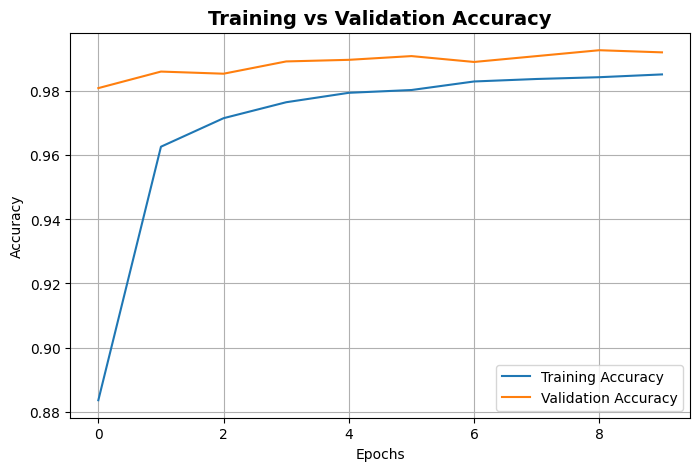

In [18]:
# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

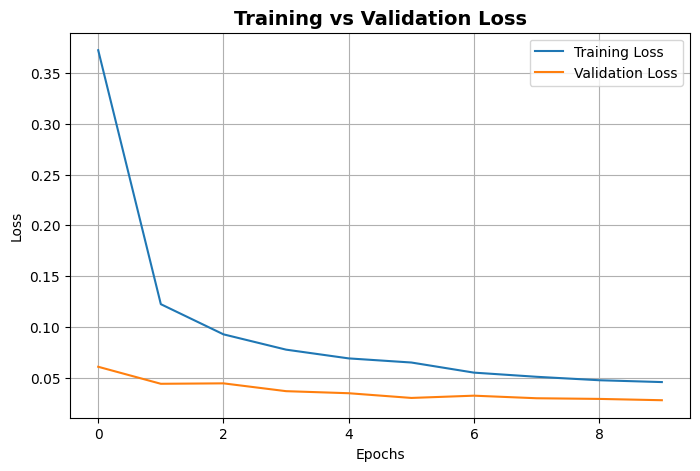

In [19]:
# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

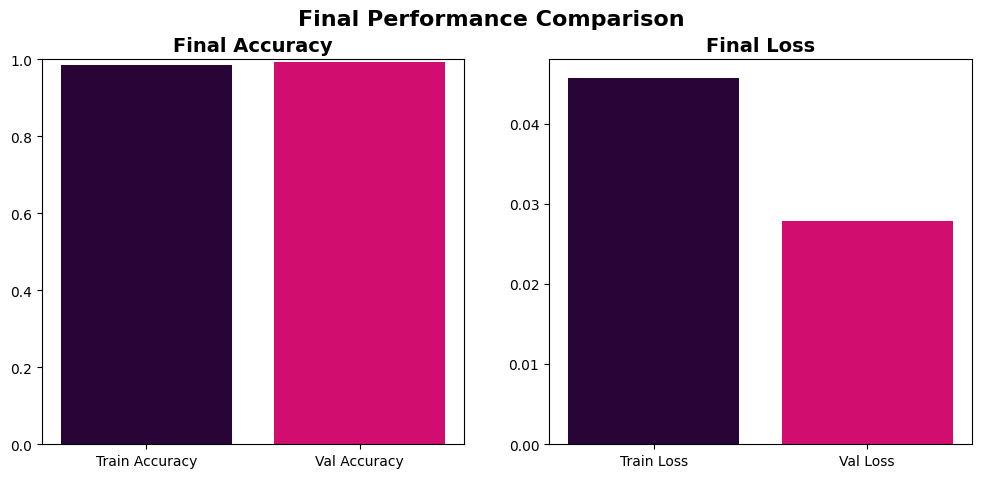

In [20]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc, color=colors)
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss, color=colors)
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")

plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()

Total Correctly Classified Images: 9930


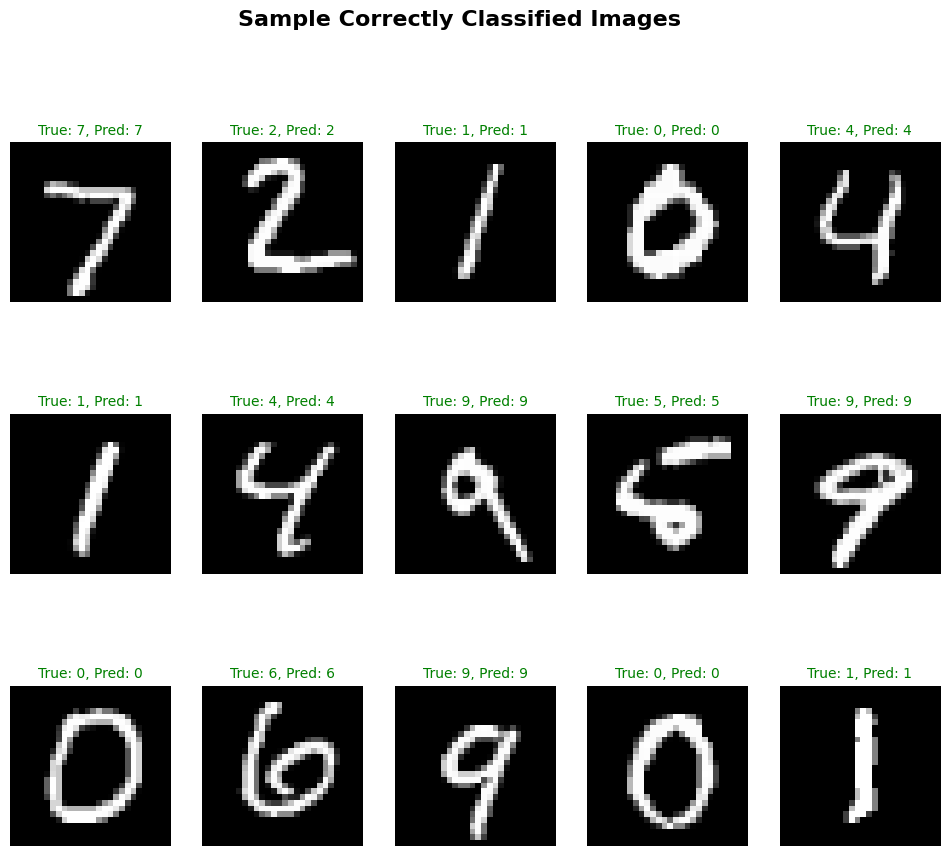

In [21]:
# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

Total Misclassified Images: 70


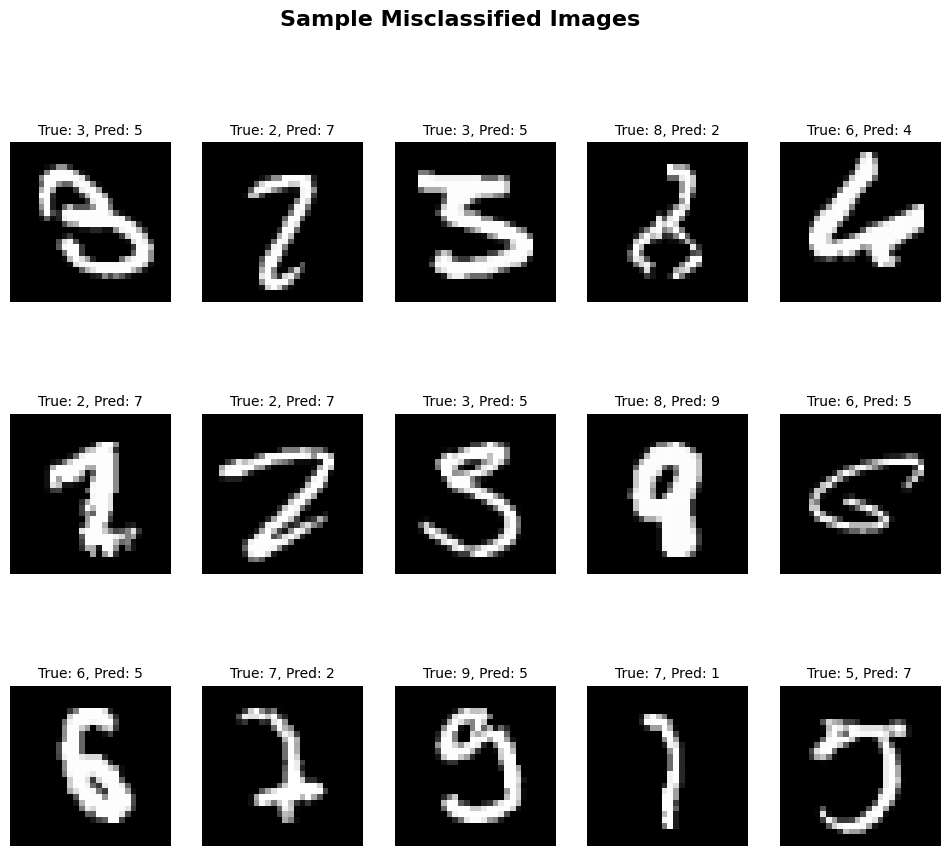

In [22]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

In [23]:
# Save the trained model
model.save("mnist_cnn_model.h5")

# Print confirmation
print("✅ Model has been saved successfully as 'mnist_cnn_model.h5'")

✅ Model has been saved successfully as 'mnist_cnn_model.h5'
